In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv(r'diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

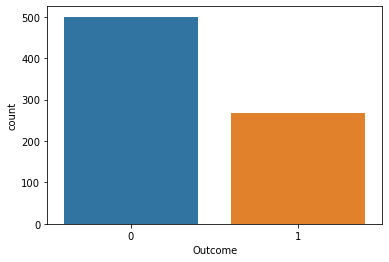

In [5]:
sns.countplot(df['Outcome'])

In [6]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1,stratify=y)

In [8]:
logistic_model = LogisticRegression()

In [9]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [10]:
y_pred = logistic_model.predict(x_test)

Evaluation on Test Data

In [11]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy is :',accuracy)

matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix is :',matrix)

report = classification_report(y_test,y_pred)
print("Classification Report is :",report)

Accuracy is : 0.7575757575757576
Confusion Matrix is : [[131  19]
 [ 37  44]]
Classification Report is :               precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.70      0.54      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



In [12]:
precision = precision_score(y_test,y_pred)
print("Precision is:",precision)

recall = recall_score(y_test,y_pred)
print("Recall is:",recall)

f1score = f1_score(y_test,y_pred)
print("f1score is :",f1score)

Precision is: 0.6984126984126984
Recall is: 0.5432098765432098
f1score is : 0.611111111111111


Evaluation On Training Data

In [13]:
y_pred_train = logistic_model.predict(x_train)

train_accuracy = accuracy_score(y_train,y_pred_train)
print("Training Accuracy is :",train_accuracy)

conf1 = confusion_matrix(y_train,y_pred_train)
print("Training Confusion matrix is :",conf1)

class_report = classification_report(y_train,y_pred_train)
print('Class Report is :',class_report)

Training Accuracy is : 0.7839851024208566
Training Confusion matrix is : [[310  40]
 [ 76 111]]
Class Report is :               precision    recall  f1-score   support

           0       0.80      0.89      0.84       350
           1       0.74      0.59      0.66       187

    accuracy                           0.78       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.78      0.78       537



In [14]:
precision1 = precision_score(y_train,y_pred_train)
print("Precision is:",precision1)

recall1 = recall_score(y_train,y_pred_train)
print("Recall is:",recall1)

f1score1 = f1_score(y_train,y_pred_train)
print("f1score is :",f1score1)

Precision is: 0.7350993377483444
Recall is: 0.5935828877005348
f1score is : 0.6568047337278107


In [15]:
array = np.zeros(x.shape[1],dtype = int)

In [16]:
array

array([0, 0, 0, 0, 0, 0, 0])

In [17]:
x.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [18]:
Glucose = 148
BloodPressure = 50
SkinThickness = 35
Insulin = 0
BMI = 33.7
DiabetesPedigreeFunction = 0.627
Age = 50

In [19]:
array[0] = Glucose
array[1] = BloodPressure
array[2] = SkinThickness
array[3] = Insulin
array[4] = BMI
array[5] = DiabetesPedigreeFunction
array[6] = Age

In [20]:
output = logistic_model.predict([array])
print(output)

[1]


In [21]:
import pickle

with open('log.pkl','wb') as f:
    pickle.dump(logistic_model,f)